# Příspěvky na transparentním účtu Lidé PRO

- základní statistiky a grafy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(style="darkgrid", palette="colorblind", font_scale=1.1, rc={'figure.figsize':(16,8)})

## Načtení dat

- načte všechny transakce z transparentního účtu
  - aktuálně je definováno rozmezí 20.10.2020 (pár dní před prvními příspěvky) až 31.12.2020
- pročistí data pro účely dalších výpočtů

In [2]:
[sumy, tx] = pd.read_html("https://ib.fio.cz/ib/transparent?a=20308993&f=20.10.2020&t=31.12.2020")
sumy

,Stav k: 20.10.2020,Stav k: 12.12.2020,Suma příjmů,Suma výdajů,Suma celkem,Běžný zůstatek
0,"0,00 CZK","1 018 543,89 CZK","1 228 564,89 CZK","-210 021,00 CZK","1 018 543,89 CZK","1 018 543,89 CZK"


In [3]:
# reverse order and replace NaNs
tx = tx.iloc[::-1].fillna('')
# set Datum as index
tx.index = pd.to_datetime(tx['Datum'], dayfirst=True)
tx = tx.drop(columns=["Datum"])
# convert Částka to float
tx['Částka'] = tx['Částka'].str.replace(",", ".").str.replace(r"[^0-9.\-]", "").astype(float)
# exclude negative values (i.e. expenses)
tx = tx[tx['Částka'] > 0]
tx

,Částka,Typ,Název protiúčtu,Zpráva pro příjemce,KS,VS,SS,Poznámka
Datum,,,,,,,,
2020-10-23,2021.0,Platba převodem uvnitř banky,"Minář, Mikuláš","Dar - PRO šťastnou plavbu, PRO lepší ČR.",,,,"Dar - PRO šťastnou plavbu, PRO lepší ČR."
2020-10-23,2021.0,Okamžitá příchozí platba,Ženatá Kamila,,0,,,Ženatá Kamila
2020-10-23,200.0,Okamžitá příchozí platba,Baloun Marek,Ať se daří,0,,,Baloun Marek
2020-10-23,666.0,Platba převodem uvnitř banky,"Beneš, Tomáš",Pravidelny prispevek Ceske cirkve satanisicke,,,,Pravidelny prispevek Ceske cirkve satanisicke
2020-10-23,1111.0,Platba převodem uvnitř banky,"Bulant, Vladislav",,,,,
...,...,...,...,...,...,...,...,...
2020-12-11,500.0,Okamžitá příchozí platba,"Peterka Aleš,Ing.",,0,13313,,"Peterka Aleš,Ing."
2020-12-11,100.0,Bezhotovostní příjem,DOCKAL TOMAS,,,322371,,DOCKAL TOMAS
2020-12-12,300.0,Okamžitá příchozí platba,"Kumstýř Miroslav,Ing",,0,322385,1,"Kumstýř Miroslav,Ing"


## Základní statistiky

- počet, průměr, směrodatná odchylka, minimum, maximum, kvantily
- kvantil *50%* je medián

In [4]:
tx.describe()

,Částka
count,563.000000
mean,2182.175648
std,14474.422567
min,0.010000
25%,300.000000
50%,500.000000
75%,1000.000000
max,297059.450000


## Výše příspěvků v jednotlivé dny

<AxesSubplot:title={'center':'Vybraná částka v jednotlivé dny'}, xlabel='Datum'>

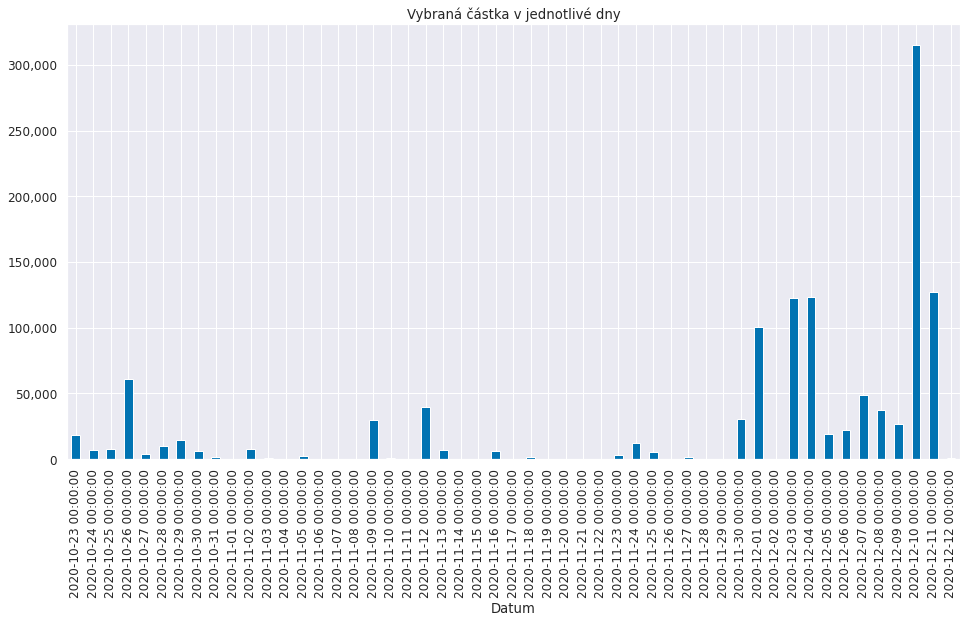

In [5]:
# contributions by days (+ filling the gaps)
cbd = tx['Částka'].groupby('Datum').sum().resample("1d").agg(np.sum)

plt.ticklabel_format(style = 'plain')
ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

cbd.plot(kind='bar', ax=ax, title='Vybraná částka v jednotlivé dny')

## Celková suma příspěvků v čase

<AxesSubplot:title={'center':'Vývoj celkové vybrané sumy v čase'}, xlabel='Datum'>

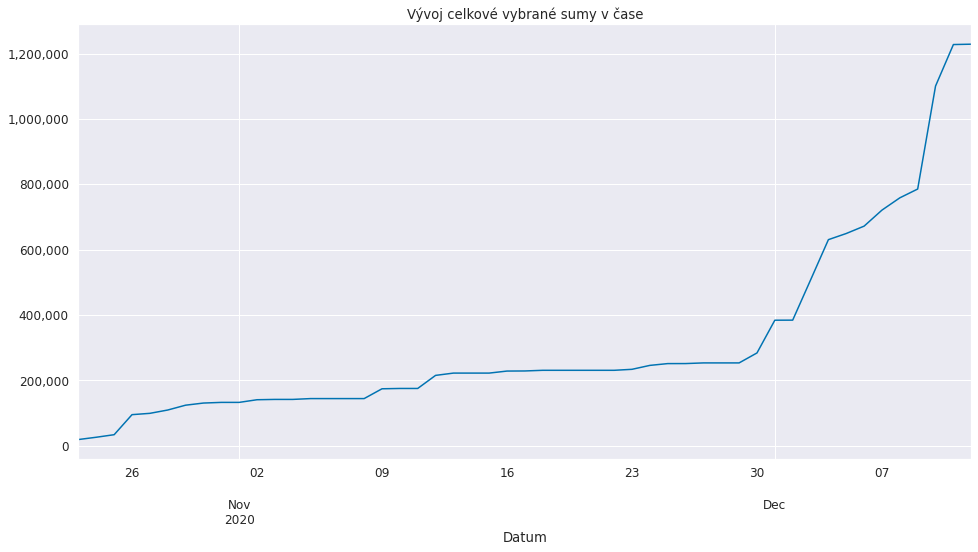

In [6]:
f = plt.figure()
plt.ticklabel_format(style = 'plain')
ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

cbd.cumsum().plot(ax=ax, title='Vývoj celkové vybrané sumy v čase')

## Nejčetnější výše příspěvků

- jakými částkami přispívají lidé nejčastěji

In [7]:
# amount frequencies
amf = tx.value_counts(['Částka']).to_frame(name='Četnost')
amf['% Příspěvků'] = (100 * amf['Četnost'] / amf['Četnost'].sum()).round(2)
amf['% Vybraného'] = (100 * amf.index.get_level_values(0) * amf['Četnost'] / (amf.index.get_level_values(0) * amf['Četnost']).sum()).round(2)
amf.sort_values(by=['Četnost','% Vybraného'], ascending=False)[:10]

,Četnost,% Příspěvků,% Vybraného
Částka,,,
1000.00,159,28.24,12.94
500.00,143,25.40,5.82
2021.00,52,9.24,8.55
200.00,43,7.64,0.70
100.00,33,5.86,0.27
300.00,20,3.55,0.49
0.01,19,3.37,0.00
5000.00,16,2.84,6.51
250.00,12,2.13,0.24


## Nejvýznamnější výše příspěvků

* které výše přispěvku přispívají nejvíc k celkové sumě

In [8]:
amf.sort_values(by='% Vybraného', ascending=False)[:10]

,Četnost,% Příspěvků,% Vybraného
Částka,,,
297059.45,1,0.18,24.18
1000.00,159,28.24,12.94
120792.51,1,0.18,9.83
2021.00,52,9.24,8.55
100000.00,1,0.18,8.14
5000.00,16,2.84,6.51
500.00,143,25.40,5.82
20000.00,3,0.53,4.88
10000.00,5,0.89,4.07


## Nejvyyší příspěvky

In [9]:
tx.sort_values(by='Částka', ascending=False)[:10]

,Částka,Typ,Název protiúčtu,Zpráva pro příjemce,KS,VS,SS,Poznámka
Datum,,,,,,,,
2020-12-10,297059.45,Bezhotovostní příjem,STRIPE TECHNOLOGY EU,STRIPE,0,0,0,Agregované dary kartou přes platební bránu Str...
2020-12-11,120792.51,Bezhotovostní příjem,STRIPE TECHNOLOGY EU,STRIPE,0,0,0,Agregované dary kartou přes platební bránu Str...
2020-12-01,100000.00,Bezhotovostní příjem,Zdeněk Rýzner,Zdeněk Rýzner,,,,Zdeněk Rýzner
2020-10-26,50000.00,Bezhotovostní příjem,TOMAS ZAJIC,"VĚŘIT V NĚKOHO NEZNAMENÁ, ŽE UDĚLÁTO CO CHCI, ...",77,,,TOMAS ZAJIC
2020-11-12,40000.00,Bezhotovostní příjem,Hausenblas Martin,,0,,,Hausenblas Martin
2020-11-30,30000.00,Okamžitá příchozí platba,"Šroub Pavel,PharmDr.",Pavel Šroub dar 2,0,6.60927e+09,,"Šroub Pavel,PharmDr."
2020-12-03,20000.00,Platba převodem uvnitř banky,"Ing. Resler, Tomáš",,,321852,1,
2020-12-08,20000.00,Bezhotovostní příjem,Knížek Miloslav,,,322226,1,Knížek Miloslav
2020-11-09,20000.00,Bezhotovostní příjem,"Šroub Pavel,PharmDr.",Pavel Šroub dar,0,6.60927e+09,,"Šroub Pavel,PharmDr."


## Velcí vs. malí dárci

- jaká část se vybrala v příspěvcích nad 10 tisíc a jaká část v příspěvcích pod 10 000 Kč

<AxesSubplot:title={'center':'Podíly různých výší příspěvků na celkové vybrané sumě'}, ylabel='Částka'>

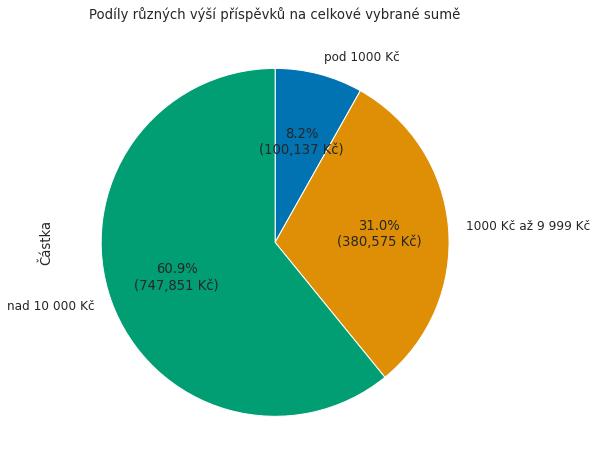

In [10]:
bins = [0, 1000, 10000, (tx['Částka'].max() // 10000 + 1)*10000]
labels = ['pod 1000 Kč','1000 Kč až 9 999 Kč','nad 10 000 Kč']
txg = tx['Částka'].groupby(by=pd.cut(tx['Částka'], bins=bins, labels=labels, right=False)).sum()
txg.plot.pie(counterclock=False, startangle=90, title='Podíly různých výší příspěvků na celkové vybrané sumě',
            autopct=lambda pct: "{:1.1f}%\n({:,} Kč)".format(pct, int(txg.sum()*pct/100)))